In [1]:
import json
import cv2  
import glob
import numpy as np
import pandas as pd
import os
import string
import shutup
from skimage import io
shutup.mute_warnings()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('notebook')

## Reading data

In [2]:
figures_data = pd.read_csv('CT_cluster_data.csv')
figures_data.shape

(45114, 15)

## Image filtering - size

In [3]:
def caption_to_figure(caption_dict):
    figure_file_name = '_'.join([caption_dict['pdf_hash'], caption_dict['fig_uri']])
    return figure_file_name

In [6]:
drop_index = []

for i in range(len(figures_data)):
    sample_dict = figures_data.iloc[i]
    im_path = os.path.join('figures/', caption_to_figure(figures_data.iloc[0]))
    image = io.imread(im_path)
    if image.shape[0] < 64 or image.shape[1] < 64 or image.shape[0] > 1024 or image.shape[1] > 1024:
        drop_index.append(i)

figures_data = figures_data.drop(drop_index)
figures_data.shape

(45114, 15)

## Text filtering - min caption size

In [13]:
figures_data = figures_data[figures_data['num_words'] > 25]
figures_data.shape

(26431, 15)

## Text filtering - max caption size

<AxesSubplot:>

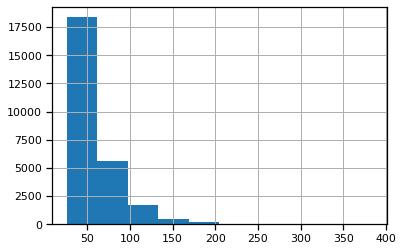

In [14]:
figures_data['num_words'].hist()

In [16]:
# Dropping cases when captions have more than 100 words
figures_data = figures_data[figures_data['num_words'] < 100]
figures_data.shape

(24180, 15)

## Random choice of 5k

<!-- IU unfiltered (full raw) dataset has 7k images, is that right?
so is it correct to  -->

In [19]:
filtered_dataset = figures_data.sample(5000)
filtered_dataset.to_csv('Cleaned_CT_cluster_data.csv')